In [1]:
import sklearn
from sklearn import datasets
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

(30, 4096)
[0 1 2]


<IPython.core.display.Javascript object>


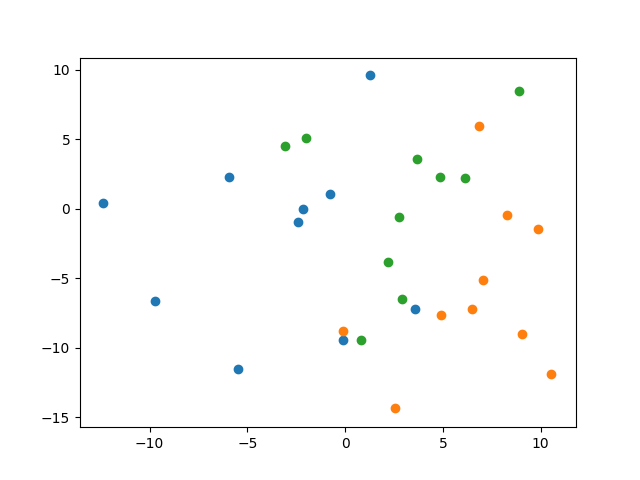

In [2]:
# Create data; 3 clusters with 64^2 features
data, labels = datasets.make_blobs(n_samples = [10]*3, n_features=64*64, cluster_std=5)
print(data.shape)
print(np.unique(labels))
plt.figure()
plt.scatter(data[labels==0, 0], data[labels==0, 1])
plt.scatter(data[labels==1, 0], data[labels==1, 1])
plt.scatter(data[labels==2, 0], data[labels==2, 1])

<IPython.core.display.Javascript object>


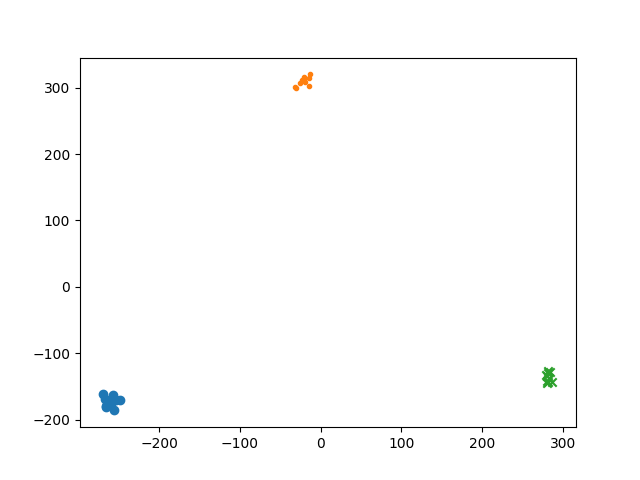

In [3]:
# Get PCA decomposition, use only 2 PCs
pca = PCA(n_components=30)
pca.fit(data)
data_transf = pca.transform(data)
plt.figure()
plt.scatter(data_transf[labels==0, 0], data_transf[labels==0, 1],marker='o')
plt.scatter(data_transf[labels==1, 0], data_transf[labels==1, 1],marker='.')
plt.scatter(data_transf[labels==2, 0], data_transf[labels==2, 1],marker='x')

<IPython.core.display.Javascript object>


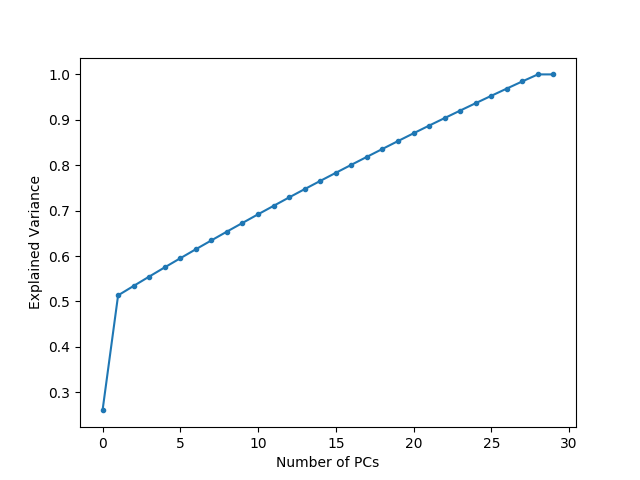

Text(0, 0.5, 'Explained Variance')

In [4]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_) / np.sum(pca.explained_variance_ratio_),'.-')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')

How do we select how many PCs are sufficient? If we want reconstruction, then variance explained is sufficient. If we have some downstream task (e.g. detection/identification), we can evaluate the number of PCs needed based on performance.

<IPython.core.display.Javascript object>


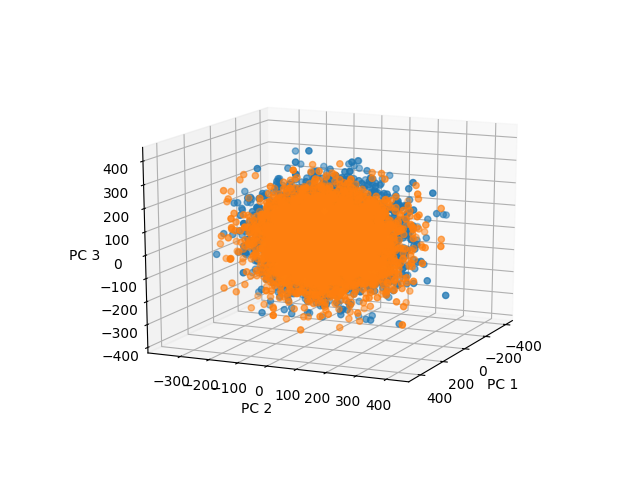

<IPython.core.display.Javascript object>


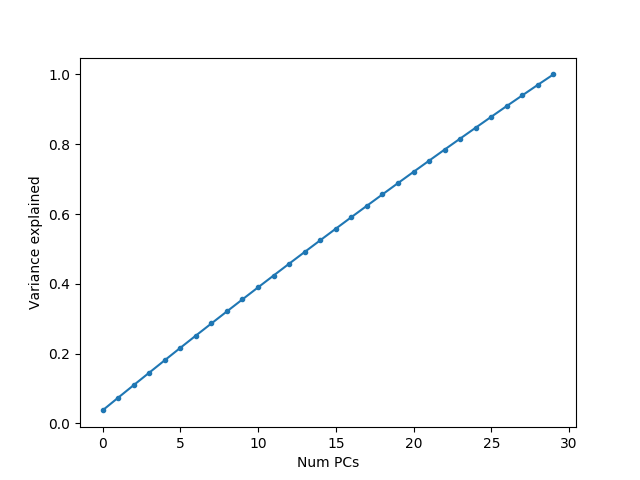

Text(0, 0.5, 'Variance explained')

In [17]:
# Create more data; use 2 classes for simplicity
from mpl_toolkits.mplot3d import Axes3D
num_samples = [5000]*2
cluster_std = [100]*2
data, labels = datasets.make_blobs( n_samples=num_samples, n_features=30, cluster_std=cluster_std)
pca2 = PCA(n_components=30)
pca2.fit(data)
data_transf2 = pca2.transform(data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in np.unique(labels):
    ax.scatter(data_transf2[labels==i, 0], data_transf2[labels==i, 1], data_transf2[labels==i, 2])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
    
plt.figure()
plt.plot(np.cumsum(pca2.explained_variance_ratio_), '.-')
plt.xlabel('Num PCs')
plt.ylabel('Variance explained')

In [18]:
# Here, we evaluate the performance of a downstream classifier to verify the required number of PCs
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='lbfgs', multi_class='multinomial')
ind_shuffle = np.arange(data.shape[0])
np.random.shuffle(ind_shuffle)
data_shuffle = data[ind_shuffle, ...]
labels_shuffle = labels[ind_shuffle]
dat_train, dat_test, label_train, label_test = train_test_split(data_shuffle, labels_shuffle, train_size=0.7, test_size=0.3, shuffle=False)
pca2 = PCA(n_components=30)
pca2.fit(dat_train)
dat_transf_train = pca2.transform(dat_train)
dat_transf_test = pca2.transform(dat_test)


In [19]:
class_score = []
for i in range(1,30):
    log = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    log.fit(dat_transf_train[:,:i], label_train)
    class_score.append(log.score(dat_transf_test[:,:i], label_test))

log.fit(dat_train, label_train)
all_dat_score = log.score(dat_test, label_test)

<IPython.core.display.Javascript object>


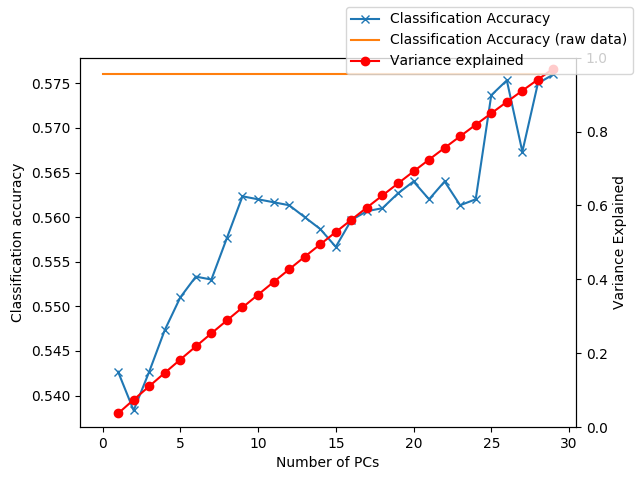

In [20]:
fig, ax = plt.subplots()

ax.plot(np.arange(1,i+1), class_score,'x-')
ax.plot([0,len(class_score)],[all_dat_score, all_dat_score])
ax.set_xlabel('Number of PCs')
ax.set_ylabel('Classification accuracy')

ax_var = ax.twinx()
ax_var.plot(np.arange(1, i+1), np.cumsum(pca2.explained_variance_ratio_[:i])/ np.sum(pca2.explained_variance_ratio_), 'ro-')
ax_var.set_ylabel('Variance Explained')
ax_var.set_ylim([0,1])
fig.legend(['Classification Accuracy','Classification Accuracy (raw data)','Variance explained'])